<a href="https://colab.research.google.com/github/Jimbobaus/project---What-Watts---Group-A/blob/main/Sandpit_for_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sandpit for What Watts capstone project


In [ ]:

!git clone https://github.com/Jimbobaus/project.git

fatal: destination path 'project' already exists and is not an empty directory.


In [ ]:

# Fix: fatal: destination path 'project' already exists and is not an empty directory.
!git clone https://github.com/Jimbobaus/project.git temp
!cp temp/data/NSW\ Public\ Holidays.csv project/data
!ls project/data
# !mv temp/.git project/.git
# !rm -rf temp

fatal: destination path 'temp' already exists and is not an empty directory.
 forecastdemand_nsw.csv.zip.partaa   temperature_nsw.csv.zip
 forecastdemand_nsw.csv.zip.partab   totaldemand_nsw.csv.zip
'NSW Public Holidays.csv'


In [ ]:

# Create a data folder
!mkdir -p data
# Joint forecastdemand_nsw files into a single file. 
!cat project/data/forecastdemand_nsw.csv.zip.part* > data/forecastdemand_nsw.csv.zip

In [ ]:

!cp data/forecastdemand_nsw.csv.zip /content/What

In [ ]:

# Unzip the data files into the data folder
!unzip -o data/forecastdemand_nsw.csv.zip -d data
!unzip -o project/data/temperature_nsw.csv.zip -d data
!unzip -o project/data/totaldemand_nsw.csv.zip -d data

# Remove forecastdemand_nsw.csv.zip
!rm data/forecastdemand_nsw.csv.zip

Archive:  data/forecastdemand_nsw.csv.zip
  inflating: data/forecastdemand_nsw.csv  
Archive:  project/data/temperature_nsw.csv.zip
  inflating: data/temperature_nsw.csv  
Archive:  project/data/totaldemand_nsw.csv.zip
  inflating: data/totaldemand_nsw.csv  


# Import required libraries

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn import tree

#Load data  into data frames

## Forecast Demand

In [ ]:

df_forecast = pd.read_csv("/content/data/forecastdemand_nsw.csv")
# To display the top 5 rows 
df_forecast.tail(150)

#df_forecast.info()

,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,DATETIME
10905869,2021031730,NSW1,9,7242.19,2021-03-17 18:31:47,2021-03-17 23:00:00
10905870,2021031731,NSW1,8,7243.40,2021-03-17 19:01:40,2021-03-17 23:00:00
10905871,2021031732,NSW1,7,7230.04,2021-03-17 19:31:47,2021-03-17 23:00:00
10905872,2021031733,NSW1,6,7273.77,2021-03-17 20:01:50,2021-03-17 23:00:00
10905873,2021031734,NSW1,5,7262.09,2021-03-17 20:31:40,2021-03-17 23:00:00
...,...,...,...,...,...,...
10906014,2021031736,NSW1,5,7028.45,2021-03-17 21:31:31,2021-03-18 00:00:00
10906015,2021031737,NSW1,4,7041.65,2021-03-17 22:01:34,2021-03-18 00:00:00
10906016,2021031738,NSW1,3,7087.60,2021-03-17 22:31:36,2021-03-18 00:00:00
10906017,2021031739,NSW1,2,7087.28,2021-03-17 23:01:36,2021-03-18 00:00:00


## Temperature

In [ ]:


df_temp = pd.read_csv("/content/data/temperature_nsw.csv")
# To display the top 5 rows 
df_temp.head(50)

#df_temp.info()

,LOCATION,DATETIME,TEMPERATURE
0,Bankstown,1/1/2010 0:00,23.1
1,Bankstown,1/1/2010 0:01,23.1
2,Bankstown,1/1/2010 0:30,22.9
3,Bankstown,1/1/2010 0:50,22.7
4,Bankstown,1/1/2010 1:00,22.6
5,Bankstown,1/1/2010 1:30,22.5
6,Bankstown,1/1/2010 2:00,22.5
7,Bankstown,1/1/2010 2:30,22.4
8,Bankstown,1/1/2010 3:00,22.3
9,Bankstown,1/1/2010 3:30,22.3


## Total Demand

In [ ]:

df_totaldemand = pd.read_csv("/content/data/totaldemand_nsw.csv")
# To display the top 5 rows 
df_totaldemand.head(50)

#df_totaldemand.info()

,DATETIME,TOTALDEMAND,REGIONID
0,1/1/2010 0:00,8038.00,NSW1
1,1/1/2010 0:30,7809.31,NSW1
2,1/1/2010 1:00,7483.69,NSW1
3,1/1/2010 1:30,7117.23,NSW1
4,1/1/2010 2:00,6812.03,NSW1
5,1/1/2010 2:30,6544.33,NSW1
6,1/1/2010 3:00,6377.32,NSW1
7,1/1/2010 3:30,6282.85,NSW1
8,1/1/2010 4:00,6211.49,NSW1
9,1/1/2010 4:30,6248.31,NSW1


In [ ]:

df_totaldemand.dtypes
#df_totaldemand.REGIONID.unique() # NSW1 only

DATETIME        object
TOTALDEMAND    float64
REGIONID        object
dtype: object

In [ ]:

df_temp.dtypes
#df_temp.LOCATION.unique() # Bankstown only

LOCATION        object
DATETIME        object
TEMPERATURE    float64
dtype: object

In [ ]:

df_forecast.dtypes 
#df_forecast.REGIONID.unique() # NSW1 only     

PREDISPATCHSEQNO      int64
REGIONID             object
PERIODID              int64
FORECASTDEMAND      float64
LASTCHANGED          object
DATETIME             object
dtype: object

In [ ]:

print(df_totaldemand.isnull().sum())
print(df_temp.isnull().sum())
print(df_forecast.isnull().sum())

DATETIME       0
TOTALDEMAND    0
REGIONID       0
dtype: int64
LOCATION       0
DATETIME       0
TEMPERATURE    0
dtype: int64
PREDISPATCHSEQNO    0
REGIONID            0
PERIODID            0
FORECASTDEMAND      0
LASTCHANGED         0
DATETIME            0
dtype: int64


In [ ]:

print(df_totaldemand.count)
print(df_temp.count)
print(df_forecast.count)

<bound method DataFrame.count of                DATETIME  TOTALDEMAND REGIONID
0         1/1/2010 0:00      8038.00     NSW1
1         1/1/2010 0:30      7809.31     NSW1
2         1/1/2010 1:00      7483.69     NSW1
3         1/1/2010 1:30      7117.23     NSW1
4         1/1/2010 2:00      6812.03     NSW1
...                 ...          ...      ...
196508  17/3/2021 22:00      7419.77     NSW1
196509  17/3/2021 22:30      7417.91     NSW1
196510  17/3/2021 23:00      7287.32     NSW1
196511  17/3/2021 23:30      7172.39     NSW1
196512   18/3/2021 0:00      7094.51     NSW1

[196513 rows x 3 columns]>
<bound method DataFrame.count of          LOCATION         DATETIME  TEMPERATURE
0       Bankstown    1/1/2010 0:00         23.1
1       Bankstown    1/1/2010 0:01         23.1
2       Bankstown    1/1/2010 0:30         22.9
3       Bankstown    1/1/2010 0:50         22.7
4       Bankstown    1/1/2010 1:00         22.6
...           ...              ...          ...
220321  Bankstown 

# Load additional data

## Public Holiday Data

In [ ]:
# Load data
df_publicholidays = pd.read_csv("/content/project/data/NSW Public Holidays.csv", header=0,infer_datetime_format=True,parse_dates=[['Year','Date']])
df_publicholidays.rename(columns={'Year_Date' :'DATETIME'},inplace=True)

df_publicholidays = df_publicholidays.loc[(df_publicholidays['DATETIME'].dt.year >= 2012)] # EXCLUDE PRE-2012 DATA


#df_publicholidays['DATE'] = df_publicholidays['DATETIME']
df_publicholidays['PUBLICHOLIDAYS'] = 1 # 10000 change scale from 1 to 10000 for plot
df_publicholidays = df_publicholidays.set_index(['DATETIME'])

# Drop unused columns
df_publicholidays.drop(['Day','Holiday', 'Type', 'Other'], axis = 1, inplace=True)

df_publicholidays_merge = df_publicholidays.resample('1D').mean()
df_publicholidays_merge['PUBLICHOLIDAYS'] = df_publicholidays_merge['PUBLICHOLIDAYS'].fillna(0)

df_publicholidays_merge = df_publicholidays_merge.resample('30min').ffill()
df_publicholidays_merge


,PUBLICHOLIDAYS
DATETIME,
2012-01-01 00:00:00,1.0
2012-01-01 00:30:00,1.0
2012-01-01 01:00:00,1.0
2012-01-01 01:30:00,1.0
2012-01-01 02:00:00,1.0
...,...
2021-04-01 22:00:00,0.0
2021-04-01 22:30:00,0.0
2021-04-01 23:00:00,0.0


In [ ]:
df_publicholidays_merge.loc['2012-01-02']

,PUBLICHOLIDAYS
DATETIME,
2012-01-02 00:00:00,0.0
2012-01-02 00:30:00,0.0
2012-01-02 01:00:00,0.0
2012-01-02 01:30:00,0.0
2012-01-02 02:00:00,0.0
2012-01-02 02:30:00,0.0
2012-01-02 03:00:00,0.0
2012-01-02 03:30:00,0.0
2012-01-02 04:00:00,0.0


# EDA Pre-Transformation

## Forecast Demand

In [ ]:

# # This read_csv will truncate time so create as a new dataframe
# df_forecast_eda =pd.read_csv("/content/data/forecastdemand_nsw.csv",header=0,infer_datetime_format=True,parse_dates=['DATETIME'],index_col=['DATETIME'])
# #df_forecast_eda

# # Plot resampling by month and year
# df_forecast_eda_eda_year =df_forecast_eda.resample('Y').mean()
# plt.figure(figsize=(30,5))
# plt.plot(df_forecast_eda_eda_year['FORECASTDEMAND'])

# df_forecast_eda_eda_month =df_forecast_eda.resample('M').mean()
# #plt.figure(figsize=(30,10))
# plt.plot(df_forecast_eda_eda_month['FORECASTDEMAND'])

# # Plot resampling by day
# df_forecast_eda_eda_day =df_forecast_eda.resample('D').mean()
# plt.figure(figsize=(30,5))
# plt.plot(df_forecast_eda_eda_day['FORECASTDEMAND'])

## Temperature

In [ ]:

# # This read_csv will truncate time so create as a new dataframe
# df_temp_eda =pd.read_csv("/content/data/temperature_nsw.csv",header=0,infer_datetime_format=True,parse_dates=['DATETIME'],index_col=['DATETIME'])

# # Plot resampling by month and year
# df_temp_eda_eda_year =df_temp_eda.resample('Y').mean()
# plt.figure(figsize=(30,5))
# plt.plot(df_temp_eda_eda_year['TEMPERATURE'])

# df_temp_eda_eda_month =df_temp_eda.resample('M').mean()
# #plt.figure(figsize=(30,10))
# plt.plot(df_temp_eda_eda_month['TEMPERATURE'])

# # Plot resampling by day
# df_temp_eda_eda_day =df_temp_eda.resample('D').mean()
# plt.figure(figsize=(30,5))
# plt.plot(df_temp_eda_eda_day['TEMPERATURE'])

## Total Demand

In [ ]:

# # This read_csv will truncate time so create as a new dataframe
# df_totaldemand_eda =pd.read_csv("/content/data/totaldemand_nsw.csv",header=0,infer_datetime_format=True,parse_dates=['DATETIME'],index_col=['DATETIME'])

# # Plot resampling by month and year
# df_totaldemand_eda_eda_year =df_totaldemand_eda.resample('Y').mean()
# plt.figure(figsize=(30,5))
# plt.plot(df_totaldemand_eda_eda_year['TOTALDEMAND'])

# df_totaldemand_eda_eda_month =df_totaldemand_eda.resample('M').mean()
# #plt.figure(figsize=(30,10))
# plt.plot(df_totaldemand_eda_eda_month['TOTALDEMAND'])

# # Plot resampling by day
# df_totaldemand_eda_eda_day =df_totaldemand_eda.resample('D').mean()
# plt.figure(figsize=(30,5))
# plt.plot(df_totaldemand_eda_eda_day['TOTALDEMAND'])

## Boxplot to find outliers
For any outliers, may need to replace with NaN (subject to further investigation)

In [ ]:

# sns.boxplot(x=df_forecast['FORECASTDEMAND'])
# plt.show()

In [ ]:

# sns.boxplot(x=df_temp['TEMPERATURE'])
# plt.show()

In [ ]:

# sns.boxplot(x=df_totaldemand['TOTALDEMAND'])
# plt.show()

## Histogram 

In [ ]:

# ax = df_forecast['FORECASTDEMAND'].plot.hist(bins=18, alpha=0.65)

In [ ]:

# ax = df_temp['TEMPERATURE'].plot.hist(bins=18, alpha=0.65)

In [ ]:

# ax = df_totaldemand['TOTALDEMAND'].plot.hist(bins=18, alpha=0.65)

## Distribution

In [ ]:

# sns.distplot(df_forecast["FORECASTDEMAND"])
# plt.title("Forecast Demand Distribution")

In [ ]:

# sns.distplot(df_totaldemand["TOTALDEMAND"])
# plt.title("Total Demand Distribution")

In [ ]:

# sns.distplot(df_temp["TEMPERATURE"])
# plt.title("Temperature Distribution")

# Transformation
Transformation includes following:
* Set datetime column as an index
* Convert datetime column from string to date time
* Splitting date and time columns
* Adding month, year, day name, week
* Adding public holidays (currently data.gov h as only far back to 2014, not 2010)

## Forecast Demand
* Filter to use only data form year 2012 onwards

### Main Transformation

In [ ]:

# df_forecast = pd.read_csv("/content/data/forecastdemand_nsw.csv")

# Adding date, time, month, year, day for Forecast data
df_forecast['DATETIME'] = pd.to_datetime(df_forecast['DATETIME'])
df_forecast['Date'] = df_forecast['DATETIME'].dt.date
df_forecast['Time'] = df_forecast['DATETIME'].dt.time
df_forecast['Hour'] = df_forecast['DATETIME'].dt.hour  # Hour minute feautre to forecast this as categorical
df_forecast['Hour'] =  df_forecast['Hour'].astype(str)
df_forecast['Minute'] = df_forecast['DATETIME'].dt.minute
df_forecast['MINUTE_CAT'] = df_forecast['Minute'] 
df_forecast['Minute'] =  df_forecast['Minute'].astype(str)
df_forecast['HOURMINUTE'] = df_forecast['Hour'] + '-' + df_forecast['Minute']
df_forecast['Year'] = df_forecast['DATETIME'].dt.year 
df_forecast['Month'] = pd.to_numeric(df_forecast['DATETIME'].dt.month)
df_forecast['Day'] = df_forecast['DATETIME'].dt.day
df_forecast['Day_Name'] = df_forecast['DATETIME'].dt.day_name()
df_forecast['DayOfWeek'] = pd.to_numeric(df_forecast['DATETIME'].dt.dayofweek)
df_forecast = df_forecast.set_index(['DATETIME'])

### Filter data from Year 2012 onwards 

In [ ]:

# Filter to use only data from year 2012 onwards
df_forecast = df_forecast.loc[(df_forecast['Year'] >= 2012)]

#df_forecast.tail(10)
#df_forecast.loc['2020-03-01']
df_forecast
#df_forecast.loc['2020-03'].groupby(['Date','REGIONID','Year','Month','Day']).mean()

,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,Date,Time,Hour,Minute,MINUTE_CAT,HOURMINUTE,Year,Month,Day,Day_Name,DayOfWeek
DATETIME,,,,,,,,,,,,,,,,
2012-01-01,2011123018,NSW1,71,7005.23,2011-12-30 12:31:33,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6
2012-01-01,2011123019,NSW1,70,7002.90,2011-12-30 13:01:29,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6
2012-01-01,2011123020,NSW1,69,7001.91,2011-12-30 13:31:24,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6
2012-01-01,2011123021,NSW1,68,6993.53,2011-12-30 14:01:16,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6
2012-01-01,2011123022,NSW1,67,6992.64,2011-12-30 14:31:23,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-18,2021031736,NSW1,5,7028.45,2021-03-17 21:31:31,2021-03-18,00:00:00,0,0,0,0-0,2021,3,18,Thursday,3
2021-03-18,2021031737,NSW1,4,7041.65,2021-03-17 22:01:34,2021-03-18,00:00:00,0,0,0,0-0,2021,3,18,Thursday,3
2021-03-18,2021031738,NSW1,3,7087.60,2021-03-17 22:31:36,2021-03-18,00:00:00,0,0,0,0-0,2021,3,18,Thursday,3


### Weekday Weekend (Categorical data) 

In [ ]:

# Adding & Grouping weekday, weekend to categorical column
def weekday_weekend_list(df) :
    if df['DayOfWeek'] <= 4 :
        return 'weekday'
    else:
        return 'weekend'

df_forecast['weekday_weekend'] = df_forecast.apply(lambda df_forecast:weekday_weekend_list(df_forecast), axis=1)

# Drop tenture original before grouping column
# df_forecast.drop("DayOfWeek", axis= 1, inplace= True)

df_forecast

,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,Date,Time,Hour,Minute,MINUTE_CAT,HOURMINUTE,Year,Month,Day,Day_Name,DayOfWeek,weekday_weekend
DATETIME,,,,,,,,,,,,,,,,,
2012-01-01,2011123018,NSW1,71,7005.23,2011-12-30 12:31:33,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6,weekend
2012-01-01,2011123019,NSW1,70,7002.90,2011-12-30 13:01:29,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6,weekend
2012-01-01,2011123020,NSW1,69,7001.91,2011-12-30 13:31:24,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6,weekend
2012-01-01,2011123021,NSW1,68,6993.53,2011-12-30 14:01:16,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6,weekend
2012-01-01,2011123022,NSW1,67,6992.64,2011-12-30 14:31:23,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-18,2021031736,NSW1,5,7028.45,2021-03-17 21:31:31,2021-03-18,00:00:00,0,0,0,0-0,2021,3,18,Thursday,3,weekday
2021-03-18,2021031737,NSW1,4,7041.65,2021-03-17 22:01:34,2021-03-18,00:00:00,0,0,0,0-0,2021,3,18,Thursday,3,weekday
2021-03-18,2021031738,NSW1,3,7087.60,2021-03-17 22:31:36,2021-03-18,00:00:00,0,0,0,0-0,2021,3,18,Thursday,3,weekday


### Seasons (Categorical data)

In [ ]:

# Adding & Grouping seasons categorical columns
def season_list(df) :
    if (3 <= df['Month']) & (df['Month'] <= 5) :
        return 'autumn'
    if (6 <= df['Month']) & (df['Month'] <= 8) :
        return 'winter'
    if (9 <= df['Month']) & (df['Month'] <= 11) :
        return 'spring'        
    else:
        return 'summer'

df_forecast['SEASON'] = df_forecast.apply(lambda df_forecast:season_list(df_forecast), axis=1)

# Drop tenture original before grouping column
# df_forecast.drop("DayOfWeek", axis= 1, inplace= True)

df_forecast

,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,Date,Time,Hour,Minute,MINUTE_CAT,HOURMINUTE,Year,Month,Day,Day_Name,DayOfWeek,weekday_weekend,SEASON
DATETIME,,,,,,,,,,,,,,,,,,
2012-01-01,2011123018,NSW1,71,7005.23,2011-12-30 12:31:33,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6,weekend,summer
2012-01-01,2011123019,NSW1,70,7002.90,2011-12-30 13:01:29,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6,weekend,summer
2012-01-01,2011123020,NSW1,69,7001.91,2011-12-30 13:31:24,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6,weekend,summer
2012-01-01,2011123021,NSW1,68,6993.53,2011-12-30 14:01:16,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6,weekend,summer
2012-01-01,2011123022,NSW1,67,6992.64,2011-12-30 14:31:23,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6,weekend,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-18,2021031736,NSW1,5,7028.45,2021-03-17 21:31:31,2021-03-18,00:00:00,0,0,0,0-0,2021,3,18,Thursday,3,weekday,autumn
2021-03-18,2021031737,NSW1,4,7041.65,2021-03-17 22:01:34,2021-03-18,00:00:00,0,0,0,0-0,2021,3,18,Thursday,3,weekday,autumn
2021-03-18,2021031738,NSW1,3,7087.60,2021-03-17 22:31:36,2021-03-18,00:00:00,0,0,0,0-0,2021,3,18,Thursday,3,weekday,autumn


### Minute 0 or 30 minute (Categorical data) 
* Minute O'clock and half (0 or 30 minute) vs non 0 or 30 minute (Categorical data) 

In [ ]:

# Adding 0 or 30 minutes to categorical column
def oclock_list(df) :
    if df['MINUTE_CAT'] == 0 :
        return 'oclock'
    elif df['MINUTE_CAT'] == 30 :
        return 'oclock'
    else:
        return 'non_oclock'


df_forecast['OCLOCK'] = df_forecast.apply(lambda df_forecast:oclock_list(df_forecast), axis=1)

df_forecast

,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,Date,Time,Hour,Minute,MINUTE_CAT,HOURMINUTE,Year,Month,Day,Day_Name,DayOfWeek,weekday_weekend,SEASON,OCLOCK
DATETIME,,,,,,,,,,,,,,,,,,,
2012-01-01,2011123018,NSW1,71,7005.23,2011-12-30 12:31:33,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6,weekend,summer,oclock
2012-01-01,2011123019,NSW1,70,7002.90,2011-12-30 13:01:29,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6,weekend,summer,oclock
2012-01-01,2011123020,NSW1,69,7001.91,2011-12-30 13:31:24,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6,weekend,summer,oclock
2012-01-01,2011123021,NSW1,68,6993.53,2011-12-30 14:01:16,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6,weekend,summer,oclock
2012-01-01,2011123022,NSW1,67,6992.64,2011-12-30 14:31:23,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6,weekend,summer,oclock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-18,2021031736,NSW1,5,7028.45,2021-03-17 21:31:31,2021-03-18,00:00:00,0,0,0,0-0,2021,3,18,Thursday,3,weekday,autumn,oclock
2021-03-18,2021031737,NSW1,4,7041.65,2021-03-17 22:01:34,2021-03-18,00:00:00,0,0,0,0-0,2021,3,18,Thursday,3,weekday,autumn,oclock
2021-03-18,2021031738,NSW1,3,7087.60,2021-03-17 22:31:36,2021-03-18,00:00:00,0,0,0,0-0,2021,3,18,Thursday,3,weekday,autumn,oclock


In [ ]:

df_forecast['2021-03-13']

,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,Date,Time,Hour,Minute,MINUTE_CAT,HOURMINUTE,Year,Month,Day,Day_Name,DayOfWeek,weekday_weekend,SEASON,OCLOCK
DATETIME,,,,,,,,,,,,,,,,,,,
2021-03-13 00:00:00,2021031118,NSW1,71,7370.05,2021-03-11 12:32:12,2021-03-13,00:00:00,0,0,0,0-0,2021,3,13,Saturday,5,weekend,autumn,oclock
2021-03-13 00:00:00,2021031119,NSW1,70,7370.23,2021-03-11 13:02:05,2021-03-13,00:00:00,0,0,0,0-0,2021,3,13,Saturday,5,weekend,autumn,oclock
2021-03-13 00:00:00,2021031120,NSW1,69,7370.88,2021-03-11 13:31:49,2021-03-13,00:00:00,0,0,0,0-0,2021,3,13,Saturday,5,weekend,autumn,oclock
2021-03-13 00:00:00,2021031121,NSW1,68,7376.51,2021-03-11 14:01:46,2021-03-13,00:00:00,0,0,0,0-0,2021,3,13,Saturday,5,weekend,autumn,oclock
2021-03-13 00:00:00,2021031122,NSW1,67,7373.12,2021-03-11 14:31:44,2021-03-13,00:00:00,0,0,0,0-0,2021,3,13,Saturday,5,weekend,autumn,oclock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-13 23:30:00,2021031335,NSW1,5,7459.43,2021-03-13 21:01:39,2021-03-13,23:30:00,23,30,30,23-30,2021,3,13,Saturday,5,weekend,autumn,oclock
2021-03-13 23:30:00,2021031336,NSW1,4,7479.80,2021-03-13 21:31:42,2021-03-13,23:30:00,23,30,30,23-30,2021,3,13,Saturday,5,weekend,autumn,oclock
2021-03-13 23:30:00,2021031337,NSW1,3,7532.53,2021-03-13 22:01:43,2021-03-13,23:30:00,23,30,30,23-30,2021,3,13,Saturday,5,weekend,autumn,oclock


## Temperature

In [ ]:

#df_temp = pd.read_csv("/content/data/temperature_nsw.csv")

#df_temp = df_temp_eda 
#df_temp

# Format date time
format = '%d/%m/%Y %H:%M'
df_temp['DATETIME'] = pd.to_datetime(df_temp['DATETIME'], format=format)
df_temp = df_temp.set_index(pd.DatetimeIndex(df_temp['DATETIME']))

df_temp

# Adding date, time for rollup before merge
# df_temp['DATETIME'] = pd.to_datetime(df_temp['DATETIME'])
df_temp['Date'] = df_temp['DATETIME'].dt.date
df_temp['Time'] = df_temp['DATETIME'].dt.time
df_temp['Hour'] = df_temp['DATETIME'].dt.hour
df_temp['Minute'] = df_temp['DATETIME'].dt.minute
# df_temp = df_temp.set_index(['DATETIME'])
df_temp

,LOCATION,DATETIME,TEMPERATURE,Date,Time,Hour,Minute
DATETIME,,,,,,,
2010-01-01 00:00:00,Bankstown,2010-01-01 00:00:00,23.1,2010-01-01,00:00:00,0,0
2010-01-01 00:01:00,Bankstown,2010-01-01 00:01:00,23.1,2010-01-01,00:01:00,0,1
2010-01-01 00:30:00,Bankstown,2010-01-01 00:30:00,22.9,2010-01-01,00:30:00,0,30
2010-01-01 00:50:00,Bankstown,2010-01-01 00:50:00,22.7,2010-01-01,00:50:00,0,50
2010-01-01 01:00:00,Bankstown,2010-01-01 01:00:00,22.6,2010-01-01,01:00:00,1,0
...,...,...,...,...,...,...,...
2021-03-17 23:00:00,Bankstown,2021-03-17 23:00:00,19.1,2021-03-17,23:00:00,23,0
2021-03-17 23:20:00,Bankstown,2021-03-17 23:20:00,19.0,2021-03-17,23:20:00,23,20
2021-03-17 23:30:00,Bankstown,2021-03-17 23:30:00,18.8,2021-03-17,23:30:00,23,30


### High Medium Low Temperature (Categorical data)

In [ ]:

# Adding & Grouping seasons categorical columns
def temp_list(df) :
    if (df['TEMPERATURE'] < 10) :
        return "verylow" #'1 very low'
    if (df['TEMPERATURE'] >= 10) & (df['TEMPERATURE'] < 20) :
        return "low" #'2 low'
    if (df['TEMPERATURE'] >= 20) & (df['TEMPERATURE'] < 30) :
        return "high" #'3 high'
    else:
        return "veryhigh" #'3 very high >= 30'

df_temp['TEMPERATURERANGES'] = df_temp.apply(lambda df_temp:temp_list(df_temp), axis=1)

df_temp

,LOCATION,DATETIME,TEMPERATURE,Date,Time,Hour,Minute,TEMPERATURERANGES
DATETIME,,,,,,,,
2010-01-01 00:00:00,Bankstown,2010-01-01 00:00:00,23.1,2010-01-01,00:00:00,0,0,high
2010-01-01 00:01:00,Bankstown,2010-01-01 00:01:00,23.1,2010-01-01,00:01:00,0,1,high
2010-01-01 00:30:00,Bankstown,2010-01-01 00:30:00,22.9,2010-01-01,00:30:00,0,30,high
2010-01-01 00:50:00,Bankstown,2010-01-01 00:50:00,22.7,2010-01-01,00:50:00,0,50,high
2010-01-01 01:00:00,Bankstown,2010-01-01 01:00:00,22.6,2010-01-01,01:00:00,1,0,high
...,...,...,...,...,...,...,...,...
2021-03-17 23:00:00,Bankstown,2021-03-17 23:00:00,19.1,2021-03-17,23:00:00,23,0,low
2021-03-17 23:20:00,Bankstown,2021-03-17 23:20:00,19.0,2021-03-17,23:20:00,23,20,low
2021-03-17 23:30:00,Bankstown,2021-03-17 23:30:00,18.8,2021-03-17,23:30:00,23,30,low


In [ ]:

# # Adding & Grouping seasons categorical columns
# def temp_list(df) :
#     if (df['TEMPERATURE'] < 10) :
#         return 1 #'low'
#     if (df['TEMPERATURE'] > 30) :
#         return 3 #'high'
#     else:
#         return 2 #'medium'

# df_temp['TEMPERATURERANGES'] = df_temp.apply(lambda df_temp:temp_list(df_temp), axis=1)

# df_temp

## Total Demand

In [ ]:

#df_totaldemand = df_totaldemand_eda

#df_totaldemand = pd.read_csv("/content/data/totaldemand_nsw.csv")
# Format date time
format = '%d/%m/%Y %H:%M'
df_totaldemand['DATETIME'] = pd.to_datetime(df_totaldemand['DATETIME'], format=format)
#df_totaldemand = df_totaldemand.set_index(pd.DatetimeIndex(df_totaldemand['DATETIME']))
df_totaldemand = df_totaldemand.set_index(['DATETIME'])

df_totaldemand

,TOTALDEMAND,REGIONID
DATETIME,,
2010-01-01 00:00:00,8038.00,NSW1
2010-01-01 00:30:00,7809.31,NSW1
2010-01-01 01:00:00,7483.69,NSW1
2010-01-01 01:30:00,7117.23,NSW1
2010-01-01 02:00:00,6812.03,NSW1
...,...,...
2021-03-17 22:00:00,7419.77,NSW1
2021-03-17 22:30:00,7417.91,NSW1
2021-03-17 23:00:00,7287.32,NSW1


# Merge all dataframes
To merge 3 dataframes into one dataframe, below tranformation required when merge.
From: 2010-01-01
To: 2021-03-18

1. Forecast demand
* Data with date time every 30 minutes, multiple data points for each time
* The last data point to be taken
2. Temperature
* Data with date time every 30 minutes (some inconsistent), multiple data points for each time
* Average data to be taken
3. Total demand
* Data with date time every 30 minutes

## Forecast Demand
Rollup to get last changed per date time

In [ ]:

# Before Merge
#df_forecast_merge = df_forecast.loc['2020-03-01']
df_forecast_merge = df_forecast

# Multiple data poitns pick only the last one using over partition rank by periodid

df_forecast_merge['rank_periodid'] = df_forecast_merge.groupby('DATETIME')['PERIODID'].rank(method='first')

df_forecast_merge = df_forecast_merge[df_forecast_merge['rank_periodid']==1]
df_forecast_merge

,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,Date,Time,Hour,Minute,MINUTE_CAT,HOURMINUTE,Year,Month,Day,Day_Name,DayOfWeek,weekday_weekend,SEASON,OCLOCK,rank_periodid
DATETIME,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,2011123140,NSW1,1,7073.47,2011-12-31 23:31:01,2012-01-01,00:00:00,0,0,0,0-0,2012,1,1,Sunday,6,weekend,summer,oclock,1.0
2012-01-01 00:30:00,2011123141,NSW1,1,6938.19,2012-01-01 00:01:07,2012-01-01,00:30:00,0,30,30,0-30,2012,1,1,Sunday,6,weekend,summer,oclock,1.0
2012-01-01 01:00:00,2011123142,NSW1,1,6820.57,2012-01-01 00:30:58,2012-01-01,01:00:00,1,0,0,1-0,2012,1,1,Sunday,6,weekend,summer,oclock,1.0
2012-01-01 01:30:00,2011123143,NSW1,1,6564.27,2012-01-01 01:01:02,2012-01-01,01:30:00,1,30,30,1-30,2012,1,1,Sunday,6,weekend,summer,oclock,1.0
2012-01-01 02:00:00,2011123144,NSW1,1,6337.37,2012-01-01 01:31:06,2012-01-01,02:00:00,2,0,0,2-0,2012,1,1,Sunday,6,weekend,summer,oclock,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-17 22:00:00,2021031736,NSW1,1,7409.33,2021-03-17 21:31:31,2021-03-17,22:00:00,22,0,0,22-0,2021,3,17,Wednesday,2,weekday,autumn,oclock,1.0
2021-03-17 22:30:00,2021031737,NSW1,1,7422.63,2021-03-17 22:01:34,2021-03-17,22:30:00,22,30,30,22-30,2021,3,17,Wednesday,2,weekday,autumn,oclock,1.0
2021-03-17 23:00:00,2021031738,NSW1,1,7313.13,2021-03-17 22:31:36,2021-03-17,23:00:00,23,0,0,23-0,2021,3,17,Wednesday,2,weekday,autumn,oclock,1.0


## Temperature
Rollup for non 00:00 or 00:30:  
between 00:00 and < 00:30 => 00:00 
between 00:30 and < 00:59 => 00:30 

In [ ]:

#df_temp = pd.read_csv("/content/data/temperature_nsw.csv")
#df_temp =pd.read_csv("/content/data/temperature_nsw.csv",header=0,infer_datetime_format=True,parse_dates=['DATETIME'],index_col=['DATETIME'])


# # Format date time
# format = '%d/%m/%Y %H:%M'
# df_temp['DATETIME'] = pd.to_datetime(df_temp['DATETIME'], format=format)
# df_temp = df_temp.set_index(pd.DatetimeIndex(df_temp['DATETIME']))

# df_temp



In [ ]:

df_temp_merge = df_temp.resample('30min').mean() # This will also added new rows when missing time interval

df_temp_merge.dtypes

TEMPERATURE    float64
Hour           float64
Minute         float64
dtype: object

In [ ]:

df_temp_merge

,TEMPERATURE,Hour,Minute
DATETIME,,,
2010-01-01 00:00:00,23.10,0.0,0.5
2010-01-01 00:30:00,22.80,0.0,40.0
2010-01-01 01:00:00,22.60,1.0,0.0
2010-01-01 01:30:00,22.50,1.0,30.0
2010-01-01 02:00:00,22.50,2.0,0.0
...,...,...,...
2021-03-17 22:00:00,19.70,22.0,0.0
2021-03-17 22:30:00,19.50,22.0,30.0
2021-03-17 23:00:00,19.05,23.0,10.0


## Merge 

In [ ]:

# # Merge all dataframes into the final dataframe

#df_forecast_merge = df_forecast.loc['2020-03-01']
dfs = [df_forecast_merge, df_temp_merge, df_totaldemand, df_publicholidays_merge]
# dfs = [df_forecast_merge, df_publicholidays_merge]
#dfs = [df_forecast_merge, df_temp_merge]
#dfs = [df_temp, df_totaldemand]

df_final = df_forecast_merge

for df in dfs:
    df_final = df_final.merge(df, on=['DATETIME'], how='outer')
    
#df_final.columns

In [ ]:
df_final

,PREDISPATCHSEQNO_x,REGIONID_x,PERIODID_x,FORECASTDEMAND_x,LASTCHANGED_x,Date_x,Time_x,Hour_x,Minute_x,MINUTE_CAT_x,HOURMINUTE_x,Year_x,Month_x,Day_x,Day_Name_x,DayOfWeek_x,weekday_weekend_x,SEASON_x,OCLOCK_x,rank_periodid_x,PREDISPATCHSEQNO_y,REGIONID_y,PERIODID_y,FORECASTDEMAND_y,LASTCHANGED_y,Date_y,Time_y,Hour_y,Minute_y,MINUTE_CAT_y,HOURMINUTE_y,Year_y,Month_y,Day_y,Day_Name_y,DayOfWeek_y,weekday_weekend_y,SEASON_y,OCLOCK_y,rank_periodid_y,TEMPERATURE,Hour,Minute,TOTALDEMAND,REGIONID,PUBLICHOLIDAYS
DATETIME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,2.011123e+09,NSW1,1.0,7073.47,2011-12-31 23:31:01,2012-01-01,00:00:00,0,0,0.0,0-0,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,2.011123e+09,NSW1,1.0,7073.47,2011-12-31 23:31:01,2012-01-01,00:00:00,0,0,0.0,0-0,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,15.4,0.0,0.0,7079.08,NSW1,1.0
2012-01-01 00:30:00,2.011123e+09,NSW1,1.0,6938.19,2012-01-01 00:01:07,2012-01-01,00:30:00,0,30,30.0,0-30,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,2.011123e+09,NSW1,1.0,6938.19,2012-01-01 00:01:07,2012-01-01,00:30:00,0,30,30.0,0-30,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,14.7,0.0,30.0,6976.86,NSW1,1.0
2012-01-01 01:00:00,2.011123e+09,NSW1,1.0,6820.57,2012-01-01 00:30:58,2012-01-01,01:00:00,1,0,0.0,1-0,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,2.011123e+09,NSW1,1.0,6820.57,2012-01-01 00:30:58,2012-01-01,01:00:00,1,0,0.0,1-0,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,14.9,1.0,0.0,6796.47,NSW1,1.0
2012-01-01 01:30:00,2.011123e+09,NSW1,1.0,6564.27,2012-01-01 01:01:02,2012-01-01,01:30:00,1,30,30.0,1-30,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,2.011123e+09,NSW1,1.0,6564.27,2012-01-01 01:01:02,2012-01-01,01:30:00,1,30,30.0,1-30,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,14.2,1.0,30.0,6494.43,NSW1,1.0
2012-01-01 02:00:00,2.011123e+09,NSW1,1.0,6337.37,2012-01-01 01:31:06,2012-01-01,02:00:00,2,0,0.0,2-0,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,2.011123e+09,NSW1,1.0,6337.37,2012-01-01 01:31:06,2012-01-01,02:00:00,2,0,0.0,2-0,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,13.9,2.0,0.0,6271.40,NSW1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2021-04-01 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2021-04-01 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Add working day or non working day categorical data

In [ ]:
# Adding & Grouping working, non-working data to categorical column
def public_holidays_list(df) :
    if df['PUBLICHOLIDAYS'] == 1 or df['weekday_weekend_x'] == "weekend":
        return 'non_working'
    else:
        return 'working'

# df_forecast_merge['WORKINGDAY'] = df_forecast_merge.apply(lambda df_forecast_merge:public_holidays_list(df_forecast_merge), axis=1)

df_final['WORKINGDAY'] = df_final.apply(lambda df_final:public_holidays_list(df_final), axis=1)

# Drop original before grouping column
# df_forecast.drop("DayOfWeek", axis= 1, inplace= True)

df_final

,PREDISPATCHSEQNO_x,REGIONID_x,PERIODID_x,FORECASTDEMAND_x,LASTCHANGED_x,Date_x,Time_x,Hour_x,Minute_x,MINUTE_CAT_x,HOURMINUTE_x,Year_x,Month_x,Day_x,Day_Name_x,DayOfWeek_x,weekday_weekend_x,SEASON_x,OCLOCK_x,rank_periodid_x,PREDISPATCHSEQNO_y,REGIONID_y,PERIODID_y,FORECASTDEMAND_y,LASTCHANGED_y,Date_y,Time_y,Hour_y,Minute_y,MINUTE_CAT_y,HOURMINUTE_y,Year_y,Month_y,Day_y,Day_Name_y,DayOfWeek_y,weekday_weekend_y,SEASON_y,OCLOCK_y,rank_periodid_y,TEMPERATURE,Hour,Minute,TOTALDEMAND,REGIONID,PUBLICHOLIDAYS,WORKINGDAY
DATETIME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,2.011123e+09,NSW1,1.0,7073.47,2011-12-31 23:31:01,2012-01-01,00:00:00,0,0,0.0,0-0,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,2.011123e+09,NSW1,1.0,7073.47,2011-12-31 23:31:01,2012-01-01,00:00:00,0,0,0.0,0-0,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,15.4,0.0,0.0,7079.08,NSW1,1.0,non_working
2012-01-01 00:30:00,2.011123e+09,NSW1,1.0,6938.19,2012-01-01 00:01:07,2012-01-01,00:30:00,0,30,30.0,0-30,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,2.011123e+09,NSW1,1.0,6938.19,2012-01-01 00:01:07,2012-01-01,00:30:00,0,30,30.0,0-30,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,14.7,0.0,30.0,6976.86,NSW1,1.0,non_working
2012-01-01 01:00:00,2.011123e+09,NSW1,1.0,6820.57,2012-01-01 00:30:58,2012-01-01,01:00:00,1,0,0.0,1-0,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,2.011123e+09,NSW1,1.0,6820.57,2012-01-01 00:30:58,2012-01-01,01:00:00,1,0,0.0,1-0,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,14.9,1.0,0.0,6796.47,NSW1,1.0,non_working
2012-01-01 01:30:00,2.011123e+09,NSW1,1.0,6564.27,2012-01-01 01:01:02,2012-01-01,01:30:00,1,30,30.0,1-30,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,2.011123e+09,NSW1,1.0,6564.27,2012-01-01 01:01:02,2012-01-01,01:30:00,1,30,30.0,1-30,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,14.2,1.0,30.0,6494.43,NSW1,1.0,non_working
2012-01-01 02:00:00,2.011123e+09,NSW1,1.0,6337.37,2012-01-01 01:31:06,2012-01-01,02:00:00,2,0,0.0,2-0,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,2.011123e+09,NSW1,1.0,6337.37,2012-01-01 01:31:06,2012-01-01,02:00:00,2,0,0.0,2-0,2012.0,1.0,1.0,Sunday,6.0,weekend,summer,oclock,1.0,13.9,2.0,0.0,6271.40,NSW1,1.0,non_working
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,working
2021-04-01 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,working
2021-04-01 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,working


### Drop unused columns

In [ ]:

# Drop unused columns
df_final.drop(['FORECASTDEMAND_y','PREDISPATCHSEQNO_x', 'REGIONID_x', 'PERIODID_x', 'LASTCHANGED_x', 'rank_periodid_x', 
         'PREDISPATCHSEQNO_y', 'REGIONID_y', 'PERIODID_y','LASTCHANGED_y','Date_y',
         'Time_y', 'Year_y','Month_y', 'Day_y','Day_Name_y','rank_periodid_y','REGIONID', 'DayOfWeek_x','DayOfWeek_y','weekday_weekend_y',
         'Hour_x','Minute_x', 'Hour_y','Minute_y','HOURMINUTE_y', 'SEASON_y','OCLOCK_y','MINUTE_CAT_y'], axis = 1, inplace=True) 

# Rename columns
df_final = df_final.rename({'FORECASTDEMAND_x':'FORECASTDEMAND', 'Date_x':'DATE', 'Time_x':'TIME', 'Year_x':'YEAR', 'Month_x':'MONTH', 
                 'Day_x':'DAY', 'Day_Name_x':'DAY_NAME','weekday_weekend_x':'WEEKDAY_WEEKEND','Hour':'HOUR','Minute':'MINUTE',
                 'HOURMINUTE_x':'HOURMINUTE', 'SEASON_x':'SEASON','OCLOCK_x':'OCLOCK', 'MINUTE_CAT_x':'MINUTE_CAT'}, axis='columns')

df_final

,FORECASTDEMAND,DATE,TIME,MINUTE_CAT,HOURMINUTE,YEAR,MONTH,DAY,DAY_NAME,WEEKDAY_WEEKEND,SEASON,OCLOCK,TEMPERATURE,HOUR,MINUTE,TOTALDEMAND,PUBLICHOLIDAYS,WORKINGDAY
DATETIME,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,7073.47,2012-01-01,00:00:00,0.0,0-0,2012.0,1.0,1.0,Sunday,weekend,summer,oclock,15.4,0.0,0.0,7079.08,1.0,non_working
2012-01-01 00:30:00,6938.19,2012-01-01,00:30:00,30.0,0-30,2012.0,1.0,1.0,Sunday,weekend,summer,oclock,14.7,0.0,30.0,6976.86,1.0,non_working
2012-01-01 01:00:00,6820.57,2012-01-01,01:00:00,0.0,1-0,2012.0,1.0,1.0,Sunday,weekend,summer,oclock,14.9,1.0,0.0,6796.47,1.0,non_working
2012-01-01 01:30:00,6564.27,2012-01-01,01:30:00,30.0,1-30,2012.0,1.0,1.0,Sunday,weekend,summer,oclock,14.2,1.0,30.0,6494.43,1.0,non_working
2012-01-01 02:00:00,6337.37,2012-01-01,02:00:00,0.0,2-0,2012.0,1.0,1.0,Sunday,weekend,summer,oclock,13.9,2.0,0.0,6271.40,1.0,non_working
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,working
2021-04-01 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,working
2021-04-01 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,working


#### DIFF Demand


In [ ]:

# Plot resampling by month and year
df_final['DIFFDEMAND'] = df_final['TOTALDEMAND'] - df_final['FORECASTDEMAND']


## Export csv file for model
Export final dataframe into CSV file so no need to re-run everything over and over. Just stright to the model 

In [ ]:

# Export dataframt to CSV for model
df_final.to_csv("/content/data/output.csv")

# # To read
# df_model = pd.read_csv("/content/data/output.csv")
# df_model

# EDA Public Holidays

In [ ]:

# # Plot resampling by day
# df_totaldemand_eda_eda_day =df_totaldemand_eda.resample('D').mean()
# plt.figure(figsize=(300,50))
# plt.plot(df_totaldemand_eda_eda_day['TOTALDEMAND'])
# # plt.figure(figsize=(30,5))
# plt.plot(df_publicholidays['PUBLICHOLIDAYS'], 'o')


In [ ]:

# # Plot resampling by day
# df_forecast_bushfire =df_forecast_eda.resample('D').mean()
# plt.figure(figsize=(300,50))
# plt.plot(df_forecast_eda_eda_day['FORECASTDEMAND'])
# # plt.figure(figsize=(30,5))
# plt.plot(df_publicholidays['PUBLICHOLIDAYS'], 'o')

# Data Cleansing 
Get rid of null - dropna

# EDA Correlation
1. Temp v forcast demand
2. Temp v total demand
3. Temp v total - forcast
4. Time series of total - forcast

## Heatmap

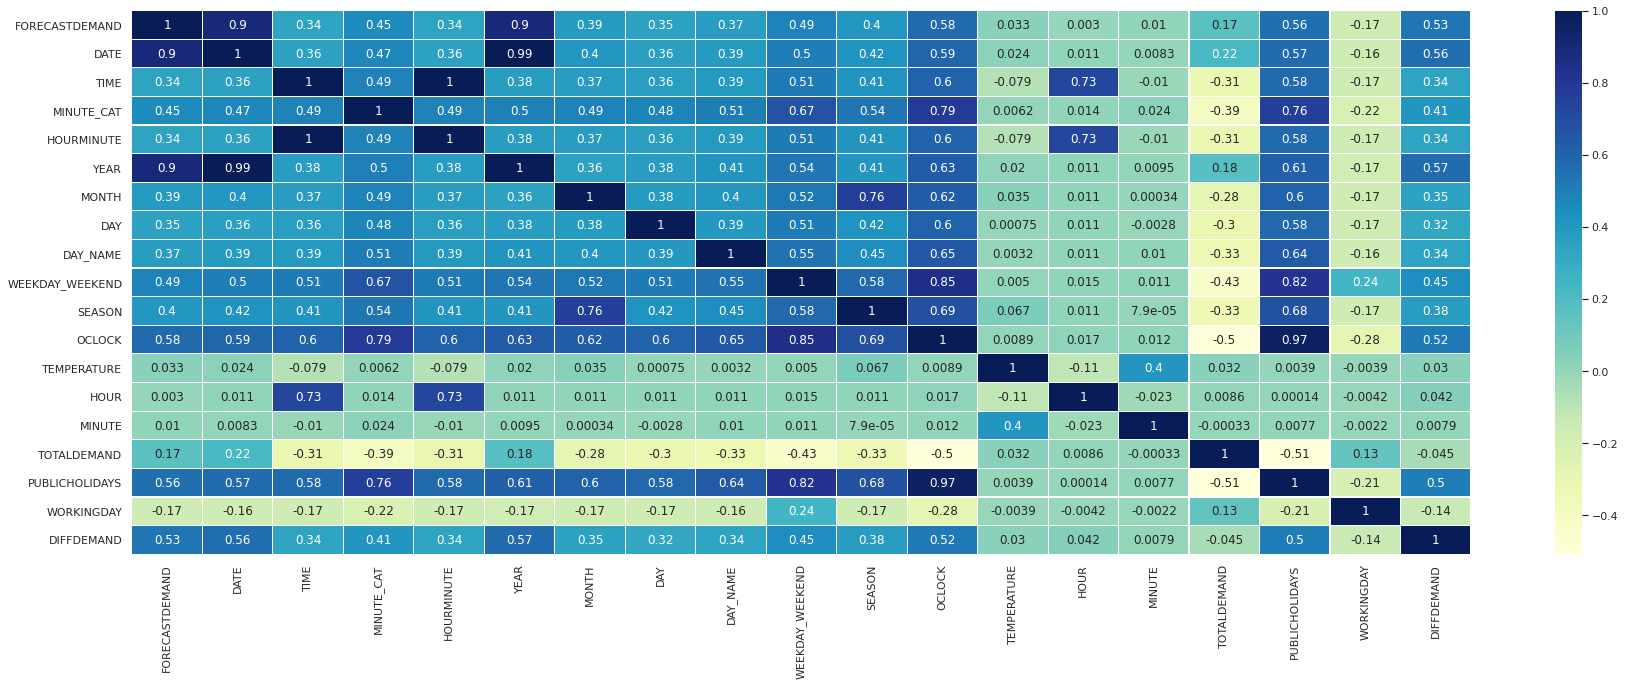

In [ ]:

# Correlation betwen features
plt.figure(figsize=(30, 10))
corr = df_final.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu", annot=True)

## Temperature


### Temperature vs Total Demand

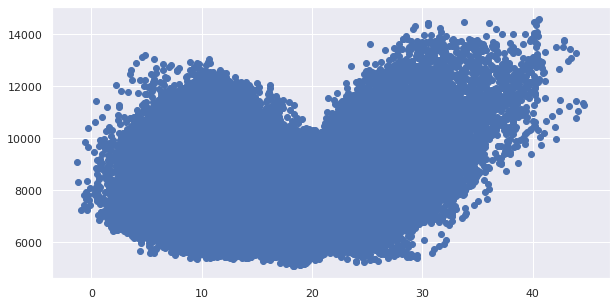

In [ ]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['TEMPERATURE'],df_final['TOTALDEMAND'])

### Temperature vs Forecast Demand

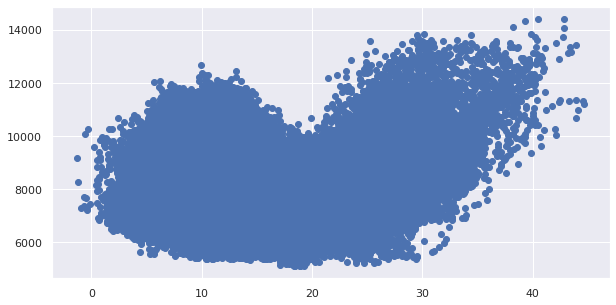

In [ ]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['TEMPERATURE'],df_final['FORECASTDEMAND'])

### Temperature vs Total - Forecast


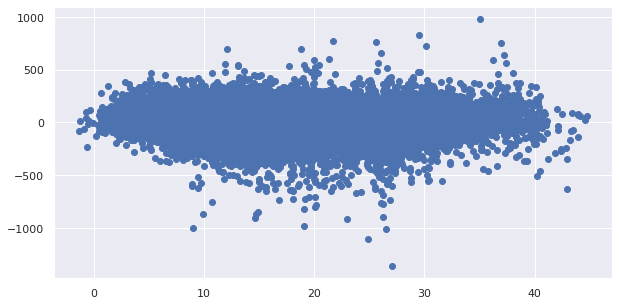

In [ ]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['TEMPERATURE'],df_final['TOTALDEMAND']-df_final['FORECASTDEMAND'])
#plt.scatter(df_final['TEMPERATURE'],df_final_eda['DIFFDEMAND'])

## Weekday-Weekend


### Weekday-Weekend vs Total Demand

In [ ]:

# plt.figure(figsize=(10,5))
# plt.scatter(df_final['WEEKDAY_WEEKEND'],df_final['TOTALDEMAND'])

### Weekday-Weekend vs Forecast Demand

In [ ]:

# plt.figure(figsize=(10,5))
# plt.scatter(df_final['WEEKDAY_WEEKEND'],df_final['FORECASTDEMAND'])

### Weekday-Weekend vs Total - Forecast

In [ ]:

# plt.figure(figsize=(10,5))
# plt.scatter(df_final['WEEKDAY_WEEKEND'],df_final['TOTALDEMAND']-df_final['FORECASTDEMAND'])
# #plt.scatter(df_final['TEMPERATURE'],df_final_eda['DIFFDEMAND'])

## Month

### Month vs Total Demand

In [ ]:

# plt.figure(figsize=(10,5))
# plt.scatter(df_final['MONTH'],df_final['TOTALDEMAND'])

### Month vs Forecast Demand

In [ ]:

# plt.figure(figsize=(10,5))
# plt.scatter(df_final['MONTH'],df_final['FORECASTDEMAND'])

### Month vs Total - Forecast

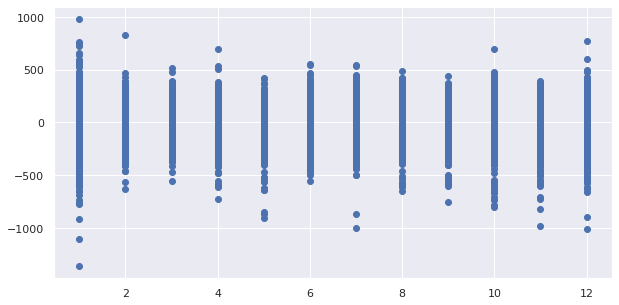

In [ ]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['MONTH'],df_final['TOTALDEMAND']-df_final['FORECASTDEMAND'])
#plt.scatter(df_final['TEMPERATURE'],df_final_eda['DIFFDEMAND'])

## Hours

### Hours vs Total Demand

In [ ]:

# plt.figure(figsize=(10,5))
# plt.scatter(df_final['HOUR'],df_final['TOTALDEMAND'])

### Hours vs Forecast Demand

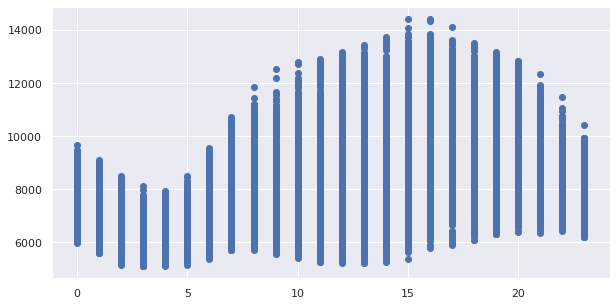

In [ ]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['HOUR'],df_final['FORECASTDEMAND'])

### Hours vs Total - Forecast

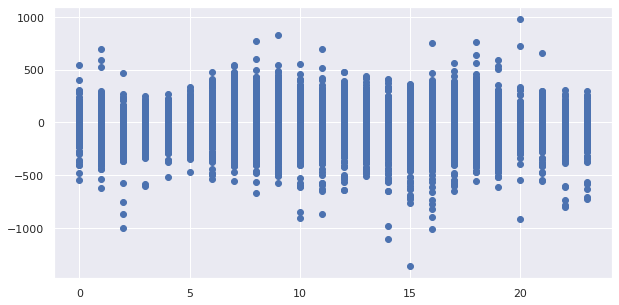

In [ ]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['HOUR'],df_final['TOTALDEMAND']-df_final['FORECASTDEMAND'])
#plt.scatter(df_final['TEMPERATURE'],df_final_eda['DIFFDEMAND'])

## Minutes

### Minutes vs Total Demand

In [ ]:

# plt.figure(figsize=(10,5))
# plt.scatter(df_final['MINUTE'],df_final['TOTALDEMAND'])

### Minutes vs Forecast Demand

In [ ]:

# plt.figure(figsize=(10,5))
# plt.scatter(df_final['MINUTE'],df_final['FORECASTDEMAND'])

### Minutes vs Total - Forecast Demand

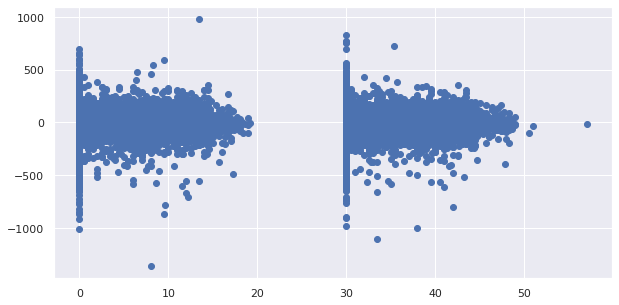

In [ ]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['MINUTE'],df_final['TOTALDEMAND']-df_final['FORECASTDEMAND'])
#plt.scatter(df_final['TEMPERATURE'],df_final_eda['DIFFDEMAND'])

## Time Series Diff Demand (Total Demand - Forecast Demand) 
Note:
* Algorithm changed in 2012

In [ ]:

# df_final_eda = df_final
# df_final_eda_year = df_final_eda.resample('Y').mean()

# plt.figure(figsize=(30,5))
# plt.plot(df_final_eda_year['DIFFDEMAND'])

# df_final_eda_eda_month =df_final_eda.resample('M').mean()
# #plt.figure(figsize=(30,10))
# plt.plot(df_final_eda_eda_month['DIFFDEMAND'])

# # Plot resampling by day
# df_final_eda_eda_day =df_final_eda.resample('D').mean()
# plt.figure(figsize=(30,5))
# plt.plot(df_final_eda_eda_day['DIFFDEMAND'])

## Regression

### Total Demand

In [ ]:

# # Resampling per month
# df_totaldemand_mon = df_final.TOTALDEMAND.resample("M").agg(sum).to_frame("TOTALDEMAND")
# df_totaldemand_mon["ix"] = range(0, len(df_totaldemand_mon))
# df_totaldemand_mon[:5]

# # Regression plot
# sns.regplot(data=df_totaldemand_mon,x="ix", y="TOTALDEMAND")
# plt.title("Trend analysis: Regression")
# plt.ylabel("Total Demand(MW)")
# plt.xlabel("")
# plt.show()

### Forecast Demand

In [ ]:

# # Resampling per month
# df_forecast_mon = df_final.FORECASTDEMAND.resample("M").agg(sum).to_frame("FORECASTDEMAND")
# df_forecast_mon["ix"] = range(0, len(df_forecast_mon))
# df_forecast_mon[:5]

# # Regression plot
# sns.regplot(data=df_forecast_mon,x="ix", y="FORECASTDEMAND")
# plt.title("Trend analysis: Regression")
# plt.ylabel("Forecast Demand(MW)")
# plt.xlabel("")
# plt.show()

## Boxplot

### Per Year

In [ ]:

# sns.boxplot(data=df_final["2010":"2021"], x="YEAR", y="TOTALDEMAND")
# plt.title("Trend Analysis: Annual Box-plot Distribution")
# plt.ylabel("Total Demand (MW")
# plt.show()

## Pairwise

In [ ]:

top5_mostCorrFeats = corr["TOTALDEMAND"].apply(abs).sort_values(ascending=False).index.values[:7]
top5_mostCorrFeats

array(['TOTALDEMAND', 'PUBLICHOLIDAYS', 'OCLOCK', 'WEEKDAY_WEEKEND',
       'MINUTE_CAT', 'SEASON', 'DAY_NAME'], dtype=object)

In [ ]:

# Take a long time so commented out for now.
# sns.pairplot(data=df_final[top5_mostCorrFeats].dropna(), kind="reg")
# plt.title("Most important features Matrix Scatter Plot")
# plt.show()

# Models

## Load the save CSV file into dataframe

In [ ]:
# Load the saved CSV file
# df_model = pd.read_csv("/content/data/output.csv")
df_model =pd.read_csv("/content/data/output.csv",header=0,infer_datetime_format=True,parse_dates=['DATETIME'],index_col=['DATETIME'])
df_model

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,5,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FORECASTDEMAND,DATE,TIME,MINUTE_CAT,HOURMINUTE,YEAR,MONTH,DAY,DAY_NAME,WEEKDAY_WEEKEND,SEASON,OCLOCK,TEMPERATURE,HOUR,MINUTE,TOTALDEMAND,PUBLICHOLIDAYS,WORKINGDAY,DIFFDEMAND
DATETIME,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,7073.47,2012-01-01,00:00:00,0.0,0-0,2012.0,1.0,1.0,Sunday,weekend,summer,oclock,15.4,0.0,0.0,7079.08,1.0,non_working,5.61
2012-01-01 00:30:00,6938.19,2012-01-01,00:30:00,30.0,0-30,2012.0,1.0,1.0,Sunday,weekend,summer,oclock,14.7,0.0,30.0,6976.86,1.0,non_working,38.67
2012-01-01 01:00:00,6820.57,2012-01-01,01:00:00,0.0,1-0,2012.0,1.0,1.0,Sunday,weekend,summer,oclock,14.9,1.0,0.0,6796.47,1.0,non_working,-24.10
2012-01-01 01:30:00,6564.27,2012-01-01,01:30:00,30.0,1-30,2012.0,1.0,1.0,Sunday,weekend,summer,oclock,14.2,1.0,30.0,6494.43,1.0,non_working,-69.84
2012-01-01 02:00:00,6337.37,2012-01-01,02:00:00,0.0,2-0,2012.0,1.0,1.0,Sunday,weekend,summer,oclock,13.9,2.0,0.0,6271.40,1.0,non_working,-65.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,working,NaN
2021-04-01 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,working,NaN
2021-04-01 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,working,NaN


### Pre-Processing
* Drop unused columns
* One-hot Encoding
* Drop Na


In [ ]:

# Drop unused columns
df_final_noonehot = df_model.drop(["DIFFDEMAND", "DATE", "TIME"] , axis= 1) # Drop FORECASTDEMAND???
#df_final_noonehot = df_final.drop(["DIFFDEMAND", "DATE", "TIME"] , axis= 1) # Drop FORECASTDEMAND???
#df_final_noonehot = df_final.drop(["FORECASTDEMAND", "DIFFDEMAND", "DATE", "TIME"] , axis= 1) # Drop FORECASTDEMAND

# Drop na
df_final_noonehot.dropna(inplace=True)

# Apply one-hot encoding get dummies for multiple classes
# df = pd.get_dummies(data = df,columns = multiple_columns) 
# df_final_onehot = pd.get_dummies(data = df_final_onehot.loc['2020']) ### LIMIT DATA TO ONLY YEAR 2021
df_final_onehot = pd.get_dummies(data = df_final_noonehot) 

# Drop below columns after feature selection using regression
# Drop unused columns
df_final_onehot.drop(['MONTH','DAY','MINUTE','PUBLICHOLIDAYS','HOURMINUTE_10-30','HOURMINUTE_16-30','HOURMINUTE_19-0'
                      ,'HOURMINUTE_17-30','HOURMINUTE_13-30','HOURMINUTE_15-30','HOURMINUTE_11-30','HOURMINUTE_12-30'
                      ], axis = 1, inplace=True) 

# X contains all the features that are used for making the predictions.
# Y contains outcomes 
X = df_final_onehot.drop(["TOTALDEMAND"] , axis= 1)
y = df_final_onehot['TOTALDEMAND']

# X = df_final_noonehot.drop(["TOTALDEMAND"] , axis= 1)
# y = df_final_noonehot['TOTALDEMAND']

df_final_onehot
# df_final_noonehot

,FORECASTDEMAND,MINUTE_CAT,YEAR,TEMPERATURE,HOUR,TOTALDEMAND,HOURMINUTE_0-0,HOURMINUTE_0-30,HOURMINUTE_1-0,HOURMINUTE_1-30,HOURMINUTE_10-0,HOURMINUTE_11-0,HOURMINUTE_12-0,HOURMINUTE_13-0,HOURMINUTE_14-0,HOURMINUTE_14-30,HOURMINUTE_15-0,HOURMINUTE_16-0,HOURMINUTE_17-0,HOURMINUTE_18-0,HOURMINUTE_18-30,HOURMINUTE_19-30,HOURMINUTE_2-0,HOURMINUTE_2-30,HOURMINUTE_20-0,HOURMINUTE_20-30,HOURMINUTE_21-0,HOURMINUTE_21-30,HOURMINUTE_22-0,HOURMINUTE_22-30,HOURMINUTE_23-0,HOURMINUTE_23-30,HOURMINUTE_3-0,HOURMINUTE_3-30,HOURMINUTE_4-0,HOURMINUTE_4-30,HOURMINUTE_5-0,HOURMINUTE_5-30,HOURMINUTE_6-0,HOURMINUTE_6-30,HOURMINUTE_7-0,HOURMINUTE_7-30,HOURMINUTE_8-0,HOURMINUTE_8-30,HOURMINUTE_9-0,HOURMINUTE_9-30,DAY_NAME_Friday,DAY_NAME_Monday,DAY_NAME_Saturday,DAY_NAME_Sunday,DAY_NAME_Thursday,DAY_NAME_Tuesday,DAY_NAME_Wednesday,WEEKDAY_WEEKEND_weekday,WEEKDAY_WEEKEND_weekend,SEASON_autumn,SEASON_spring,SEASON_summer,SEASON_winter,OCLOCK_oclock,WORKINGDAY_non_working,WORKINGDAY_working
DATETIME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,7073.47,0.0,2012.0,15.40,0.0,7079.08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0
2012-01-01 00:30:00,6938.19,30.0,2012.0,14.70,0.0,6976.86,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0
2012-01-01 01:00:00,6820.57,0.0,2012.0,14.90,1.0,6796.47,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0
2012-01-01 01:30:00,6564.27,30.0,2012.0,14.20,1.0,6494.43,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0
2012-01-01 02:00:00,6337.37,0.0,2012.0,13.90,2.0,6271.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-17 22:00:00,7409.33,0.0,2021.0,19.70,22.0,7419.77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1
2021-03-17 22:30:00,7422.63,30.0,2021.0,19.50,22.0,7417.91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1
2021-03-17 23:00:00,7313.13,0.0,2021.0,19.05,23.0,7287.32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1


## Split data

In [ ]:

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 25)

In [ ]:

# # Number of observations
nobs= len(df_final_onehot)
print("Number of observations: ", nobs)

# X_train = df_final.loc['2010':'2021'][top5_mostCorrFeats]
# #X_train = df_final[top5_mostCorrFeats]
# y_train = df_final.loc["2010":"2021"]['TOTALDEMAND']
# #y_train = df_final['TOTALDEMAND']

# X_test = df_final.loc["2018"][top5_mostCorrFeats]
# y_test = df_final.loc["2018"]['TOTALDEMAND']

n, k = X_train.shape
print("Total number of observations: ", nobs)
print("Train: {}{}, \nTest: {}{}".format(X_train.shape, y_train.shape,
                                              X_test.shape, y_test.shape))

# plt.plot(y_train.index, y_train.TOTALDEMAND.values, label="train")
# plt.plot(y_test.index, y_test.TOTALDEMAND.values, label="test")
# plt.title("Train/Test split")
# plt.xticks(rotation=45)
# plt.show()

Number of observations:  161185
Total number of observations:  161185
Train: (128948, 61)(128948,), 
Test: (32237, 61)(32237,)


## Feature Selection
* Use Regression to see significances (for regression)
* User Random Forest to see weights (for classification, not regression)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:            TOTALDEMAND   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 7.954e+05
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        09:38:53   Log-Likelihood:            -9.2491e+05
No. Observations:              161185   AIC:                         1.850e+06
Df Residuals:                  161129   BIC:                         1.850e+06
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
FORECASTDEMAND            

## Model
See experiments in Google Drive
https://docs.google.com/spreadsheets/d/1jlGG8LbfcLQqmZCmj8_bcaE1bNGVWKzMauO-W7D2-i0/edit?usp=sharing

### MLPRegressor

In [ ]:

import sklearn
import numpy as np
from sklearn.neural_network import MLPRegressor 

def rmse(pred, actual): 
	return np.sqrt(((pred-actual)**2).mean())

# Neural Network Model
mlp_adam = MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=0.001,max_iter=5000, tol=0)
mlp_adam.fit(X_train,y_train)
y_predicttrain = mlp_adam.predict(X_train)
y_predicttest = mlp_adam.predict(X_test)
train_rmse = rmse( y_predicttrain, y_train) 
test_rmse = rmse( y_predicttest, y_test) 

# print(train_acc, test_acc) 
print('Train RMSE: {}\nTest RMSE: {}'.format(train_rmse, test_rmse) )

Train RMSE: 76.15134528109628
Test RMSE: 75.56206560422122


### Plot output

In [ ]:
# y_train
# y_test
# y_predicttrain
y_predicttest

array([9242.28073443, 9036.16969305, 8167.34232143, ..., 6333.45814788,
       8288.75413797, 7296.65855569])

In [ ]:
# WIP: Need to plot y_train vs y_predicttrain, y_test vs y_predicttest
# Convert from numpy array to panda dataframd
df_y_train = pd.DataFrame(y_train, columns = ['TOTALDEMAND'])
df_y_train = df_y_train.resample('M').mean()

# merge df_y_train and df_y_predicttrain the plot???
df_y_predicttrain = pd.DataFrame(y_predicttrain, columns = ['TOTALDEMAND'])


# y_predicttest

df_y_test = pd.DataFrame(y_test, columns = ['TOTALDEMAND'])
df_y_test = df_y_test.resample('M').mean()

# Plot Output
# plt.figure(figsize=(30,10))
# plt.plot(df_y_train['TOTALDEMAND'])
# plt.plot(df_y_predicttrain['TOTALDEMAND'])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa83775bd40> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>

In [ ]:

# # Plot RMSE
# pyplot.plot(test)
# pyplot.plot(predictions)
# pyplot.show()

### LSTM

In [ ]:

#importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.preprocessing import MinMaxScaler

#used for setting the output figure size
rcParams['figure.figsize'] = 20,10

#importing the packages 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

#LSTM neural network
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adadelta')
lstm_model.fit(X_train, y_train, epochs=3, batch_size=1, verbose=2)

Epoch 1/3
128948/128948 - 2405s - loss: 63086640.0000
Epoch 2/3
128948/128948 - 2389s - loss: 62471652.0000
Epoch 3/3
128948/128948 - 2409s - loss: 62016216.0000


### Temp - do not use
 Create class

### Run

###Temp - do not use

## Calculate Target Accuracy
Calculat RMSE on Forcast and Total from complete dataset

In [ ]:

#targetaccuracy = rmse(forecast,total)
targetaccuracy = rmse(df_final['FORECASTDEMAND'],df_final['TOTALDEMAND'])
print(targetaccuracy)
# RMSE: 85.87  (including pre-2012)
# RMSE: 77.67 (excluding pre-2012)

77.67440171067919


## Other sandpit models
* Linear regression
* Keras
* Pytorch

In [ ]:

# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# #reg = LinearRegression().fit(X_train, y_train["TOTALDEMAND"])
# reg = LinearRegression().fit(X_train, y_train)
# y_train_pred = reg.predict(X_train)
# y_test_pred = reg.predict(X_test)

# RMSE_train = np.sqrt(mean_squared_error(y_train['TOTALDEMAND'], p_train))
# RMSE_test = np.sqrt(mean_squared_error(y_test['TOTALDEMAND'], p_test))

# print('Train RMSE: {}\nTest RMSE: {}'.format(RMSE_train, RMSE_test) )

In [ ]:

def summarized_scores(name,score,scores):
    s_scores=', '.join(['%.1f'%s for s in scores])
    print('%s:[%.3f] %s'%(name,score,s_scores))

In [ ]:

def to_supervized(train,n_in,n_out):
    data=train.reshape((train.shape[0]*train.shape[1],train.shape[2]))
    X,y=[],[]
    in_start=0
    for i in range(len(data)):
        in_end=in_start+n_in
        out_end=in_end+n_out
        if out_end<len(data):
            x_in=data[in_start:in_end,0]
            x_in=x_in.reshape((len(x_in),1))
            X.append(x_in)
            y.append(data[in_end:out_end,0])
        in_start+=1
    return np.array(X),np.array(y)

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM

In [ ]:

def build_model(train,n_input):
    train_x,train_y=to_supervized(train,n_input,7)
    verbose=0
    epochs=70
    batch_size=16
    n_timesteps=train_x.shape[1]
    n_features=train_x.shape[2]
    n_outputs=train_y.shape[1]
    model=Sequential()
    model.add(LSTM(200,activation='relu',input_shape=(n_timesteps,n_features)))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mse',optimizer='adam')
    model.fit(train_x,train_y,epochs=epochs,batch_size=batch_size,verbose=verbose)
    return model

In [ ]:

def forecast(model,history,n_input):
    data=np.array(history)
    data=data.reshape((data.shape[0]*data.shape[1],data.shape[2]))
    in_x=data[-n_input:,0]
    in_x=in_x.reshape((1,len(in_x),1))
    yhat=model.predict(in_x,verbose=0)
    return yhat[0]

In [ ]:

def evaluate_model(train,test,n_input):
    model=build_model(train,n_input)
    history=[x for x in train]
    prediction=[]
    for i in range(len(test)):
        yhat_s=forecast(model,history,n_input)
        prediction.append(yhat_s)
        history.append(test[i,:])
    prediction=np.array(prediction)
    score,scores=forecasts(test[:,:,0],prediction)
    return score,scores

In [ ]:

# X = df_forecast
# y = 
# # Split train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 25)

# train,test=split(df_final.values)

# WIP (Work in progress)
15. USE Radom Forest for feature selection without one-hot encoding
9. Add LSTM 

#TO DO!!!
2. Add business hours feature, low/medium/ 
3. Add colours to V shape group for weekday and weekend = DONE
7. get the date and time of the top 100 biggest errors ? 
8. Bushfire events = view, not match
10. Solar data - James
11. Daylight data
12. Cloud cover data - https://www.earthenv.org/cloud
14. Need to group business hour?

16. Regression for significances



# DONE
1. Add season/quarter feature = DONE (not improve RMSE)
2. High, low temperature = = DONE (small improvement of RMSE)
4. One hot encoding a version of “hour” or “30”mins = DONE (improve RMSE from 75 to 74.77)
13. Get baseslines RMSE = 75
5. Add public holidays
6. Add public holidays work day, non-weekday as categorical

In [ ]:

# # Generate 'business hour' feature

# for i in range(len(df_forecast)):
#     position = df_forecast.index[i]
#     hour = position.hour
#     if ((hour > 8 and hour < 12) or (hour > 14 and hour < 21)):
#         df_forecast.loc[position, 'business hour'] = 2
#     elif (hour >= 12 and hour <= 14):
#         df_forecast.loc[position, 'business hour'] = 1
#     else:
#         df_forecast.loc[position, 'business hour'] = 0